In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("BANK_dataset.csv")

In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4755,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0
1324,1325,15765537,Liang,687,Germany,Male,26,2,142721.52,1,1,1,153605.75,0
8244,8245,15656330,Von Doussa,528,Spain,Female,32,0,68138.37,1,1,1,170309.19,0
8167,8168,15793135,Wang,713,Germany,Female,24,7,147687.24,1,1,1,121592.50,0
388,389,15748936,Whitehead,709,Spain,Female,45,2,0.00,2,0,1,162922.65,0


In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3290,736,France,Female,30,9,0.00,2,1,0,34180.33,0
6003,708,Spain,Male,19,7,112615.86,1,1,1,4491.77,0
5088,543,France,Male,42,4,89838.71,3,1,0,85983.54,1
9574,554,Spain,Male,37,3,0.00,2,1,0,166177.30,0
4661,780,France,Female,43,0,0.00,1,0,1,15705.27,0


In [18]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [26]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9257,678,Germany,Female,37,8,149000.91,2,1,1,21472.42,0
9740,798,Germany,Female,29,8,80204.11,2,1,0,70223.22,0
490,591,Spain,Male,29,1,97541.24,1,1,1,196356.17,0
9827,602,Spain,Male,33,5,0.00,2,0,1,64038.34,0
8109,661,France,Female,34,0,0.00,2,1,0,185555.63,0


In [42]:
def unique_col(df): 
    for columns in df:
        if df[columns].dtypes=="object":
            print(f'{columns} : {df[columns].unique()}')

In [43]:
unique_col(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [44]:
df['Gender'].replace({"Female": 1, "Male":0},inplace=True)

In [45]:
def unique_col(df): 
    for columns in df:
        if df[columns].dtypes=="object":
            print(f'{columns} : {df[columns].unique()}')
unique_col(df)

Geography : ['France' 'Spain' 'Germany']


In [49]:
df=pd.get_dummies(data=df,columns=['Geography'])

In [50]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [52]:
from sklearn.preprocessing import MinMaxScaler as mms

In [53]:
scaler=mms()

In [57]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [58]:
col_to_dummies=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [59]:
df[col_to_dummies]=scaler.fit_transform(df[col_to_dummies])

In [60]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [61]:
def unique_col(df): 
    for columns in df:
        print(f'{columns} : {df[columns].unique()}')

In [62]:
unique_col(df)

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [63]:
y=df['Exited']
x=df.drop('Exited',axis='columns')

In [65]:
from sklearn.model_selection import train_test_split as tts

In [66]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

In [70]:
len(x_train),x_train.shape

(8000, (8000, 12))

In [72]:
len(x_test),x_test.shape

(2000, (2000, 12))

In [73]:
import tensorflow as ts
from tensorflow import keras

In [79]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(12,),activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(2,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5917 - accuracy: 0.7912
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7968
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.8059
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8129
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8196
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8231
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4254 - accura

In [81]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8525


[0.353337824344635, 0.8525000214576721]

In [83]:
yp=model.predict(x_test)
yp[:5]

array([[0.10856339],
       [0.03076389],
       [0.15128508],
       [0.2555341 ],
       [0.08793196]], dtype=float32)

In [85]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [90]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [91]:
y_test[:10]

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64

In [121]:
ynew=np.array([[0.5,1,0.6,0.2,0.33,0.66,1,0,0.56,1,1,0]])
y_new_pred=model.predict(ynew)
y_pred_new=[]
for element in y_new_pred:
    if element>0.5:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.65      0.55      0.60       393

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.85      0.85      0.85      2000



In [94]:
import seaborn as sns
cm=ts.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(0.5, 1.0, 'cONFUSION MATRIX')

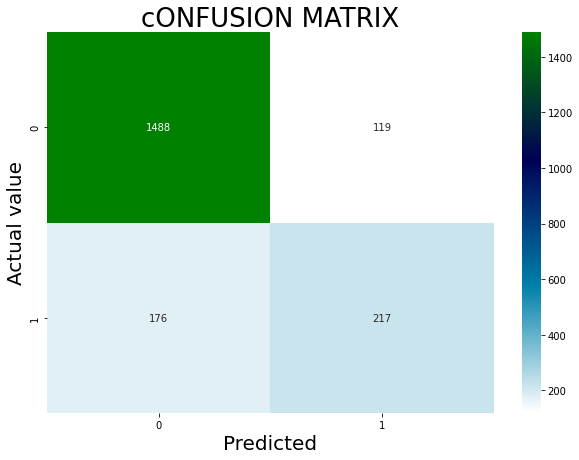

In [107]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap="ocean_r")
plt.xlabel("Predicted",fontsize=20)
plt.ylabel("Actual value",fontsize=20)
plt.title("cONFUSION MATRIX",fontsize=26)

In [123]:
x_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')